In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os
zipp = zipfile.ZipFile('/content/drive/MyDrive/E6893.zip', 'r')
zipp.extractall(os.getcwd())
zipp.close()

Mounted at /content/drive


In [ ]:
zipp = zipfile.ZipFile('/content/drive/MyDrive/E6893-2.zip', 'r')
zipp.extractall(os.getcwd())
zipp.close()

# generate images

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd

# import cv2
# from google.colab.patches import cv2_imshow

In [ ]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [ ]:
def generate_one_image(generator, file_name, test_image_path, height, width):
    input_image = tf.io.read_file(os.path.join(test_image_path, file_name))
    input_image = tf.io.decode_image(input_image, channels=3)
    input_image = tf.cast(input_image, tf.float32)

    input_image = tf.image.resize(input_image, [height, width],
                                method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    input_image = (input_image / 127.5) - 1

    input_image = tf.reshape(input_image, [1,height,width,3])
    ############# change
    # training=True or training=Fasle?
    prediction = generator(input_image, training=False)

    prediction = tf.reshape(prediction, [height,width,3])
    plt.imshow(prediction*0.5+0.5)

In [ ]:
def generate_many_images(generator, file_names_input, file_names_output, path_input, path_output, height, width):
    title = ['Input Image', 'Target Image', 'Generated Image']

    for i in range(8):
        input_image = tf.io.read_file(os.path.join(path_input, file_names_input[i]))
        input_image = tf.io.decode_image(input_image, channels=3)
        input_image = tf.cast(input_image, tf.float32)

        input_image = tf.image.resize(input_image, [height, width],
                                    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        # Normalize: getting the pixel values in the [-1, 1]
        input_image = (input_image / 127.5) - 1

        output_image = tf.io.read_file(os.path.join(path_output, file_names_output[i]))
        output_image = tf.io.decode_image(output_image, channels=3)
        output_image = tf.cast(output_image, tf.float32)

        output_image = tf.image.resize(output_image, [height, width],
                                    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        output_image = (output_image / 127.5) - 1


        input_image = tf.reshape(input_image, [1,height, width,3])
        ############# change
        # training=True or training=False?
        prediction = generator(input_image, training=False)

        input_image = tf.reshape(input_image, [height, width,3])
        prediction = tf.reshape(prediction, [height, width,3])

        plt.figure(figsize=(15, 15))
        display_list = [input_image, output_image, prediction]
        for i in range(3):
          plt.subplot(1, 3, i+1)
          plt.title(title[i])
          # Getting the pixel values in the [0, 1] range to plot.
          plt.imshow(display_list[i] * 0.5 + 0.5)
          plt.axis('off')
        plt.show()
        

# test

In [ ]:
# BUFFER_SIZE = 800 # training image size

# test_path_output = '/content/drive/MyDrive/E6893 Images/fantasy/color'
# test_path_input = '/content/drive/MyDrive/E6893 Images/fantasy/grey'
# test_path_names = '/content/drive/MyDrive/E6893 Images/all_images_fantasy.csv'
# test_files = pd.read_csv(test_path_names).image_name[BUFFER_SIZE+40:BUFFER_SIZE+48].tolist()
files_input = sorted(os.listdir(path_input))
files_input = [f1 for f1 in files_input if not (f1.startswith('._') or ('gif' in f1))]
test_file = files_input[BUFFER_SIZE+803]

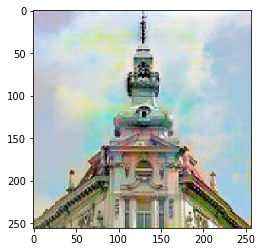

In [ ]:
generatorl6k240 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp240e.h5')
generate_one_image(generatorl6k240, test_file, path_input, 256, 256)

In [ ]:
generatorf = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pix2pix_1000train-imgs/model_fantasy200e.h5')
generate_many_images(generatorf, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

# Anime

In [ ]:
BUFFER_SIZE = 350 # training image size

path_output = '/content/E6893 Images/anime/color1'
path_input = '/content/E6893 Images/anime/grey'
path_names = '/content/E6893 Images/all_images_anime.csv'
files = pd.read_csv(path_names).image_name[BUFFER_SIZE+51:BUFFER_SIZE+59].tolist()

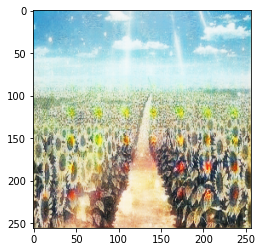

In [ ]:
generatora = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pix2pix_1000train-imgs/model_anime200e.h5')
generate_one_image(generatora, 'anime_386.jpg', '/content/E6893 Images/anime/grey', IMG_HEIGHT, IMG_WIDTH)

## 50 epochs

In [ ]:
generatora50 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pix2pix_1000train/model_anime50e.h5')

In [ ]:
generate_many_images(generatora50, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

## 200 epochs

In [ ]:
#generatora = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pix2pix_1000train-imgs/model_anime200e.h5')
generate_many_images(generatora, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

# Landscape

## 1000 training imgs

In [ ]:
BUFFER_SIZE = 1000 # training image size

path_output = '/content/E6893 Images/landscape/color'
path_input = '/content/E6893 Images/landscape/gray'
files_input = sorted(os.listdir(path_input))
files_input = [f1 for f1 in files_input if not (f1.startswith('._') or ('gif' in f1))][BUFFER_SIZE:BUFFER_SIZE+8]
files_output = sorted(os.listdir(path_output))
files_output = [f2 for f2 in files_output if not (f2.startswith('._') or ('gif' in f2))][BUFFER_SIZE:BUFFER_SIZE+8]

### 50 epochs

In [ ]:
generatorl50 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pix2pix_1000train-imgs/model_landscape50e.h5')

In [ ]:
generate_many_images(generatorl50, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 200 epochs

In [ ]:
generatorl = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pix2pix_1000train-imgs/model_landscape200e.h5')

In [ ]:
generate_many_images(generatorl, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 400e

In [ ]:
generatorl400 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pix2pix_1000train-imgs/model_landscape400e.h5')

In [ ]:
generate_many_images(generatorl400, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

## 6k training imgs

In [ ]:
BUFFER_SIZE = 6000

path_output = '/content/E6893 Images/landscape/color'
path_input = '/content/E6893 Images/landscape/gray'
files_input = sorted(os.listdir(path_input))
files_input = [f1 for f1 in files_input if not (f1.startswith('._') or ('gif' in f1))][BUFFER_SIZE+200:BUFFER_SIZE+208]
files_output = sorted(os.listdir(path_output))
files_output = [f2 for f2 in files_output if not (f2.startswith('._') or ('gif' in f2))][BUFFER_SIZE+200:BUFFER_SIZE+208]

### 650e

In [ ]:
generatorl6k650 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp650e.h5')
generate_many_images(generatorl6k650, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 600e

In [ ]:
generatorl6k600 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp600e.h5')
generate_many_images(generatorl6k600, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 400e

In [ ]:
generatorl6k400 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp400e.h5')
generate_many_images(generatorl6k400, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 350e

In [ ]:
generatorl6k350 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp350e.h5')
generate_many_images(generatorl6k350, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 300e

In [ ]:
generatorl6k300 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp300e.h5')
generate_many_images(generatorl6k300, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 240e

In [ ]:
generatorl6k240 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp240e.h5')

In [ ]:
generate_many_images(generatorl6k240, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 200e

In [ ]:
generatorl6k200 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp200e.h5')

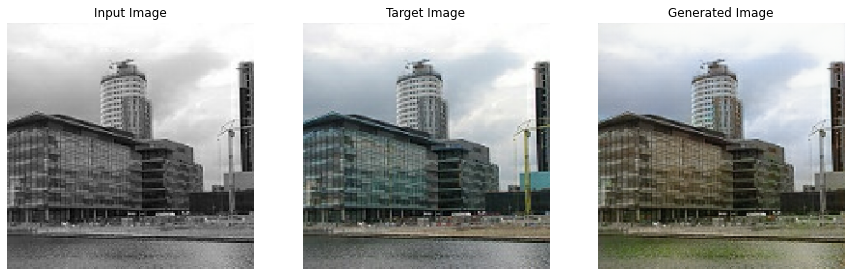

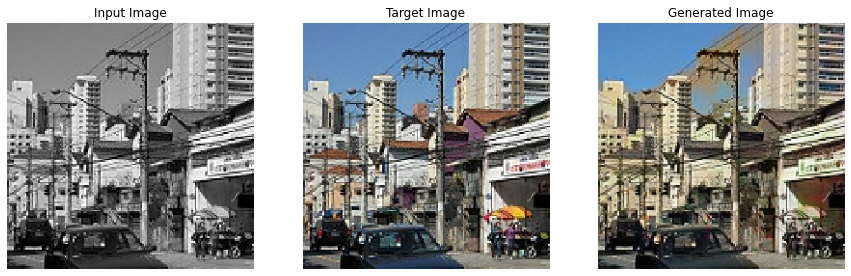

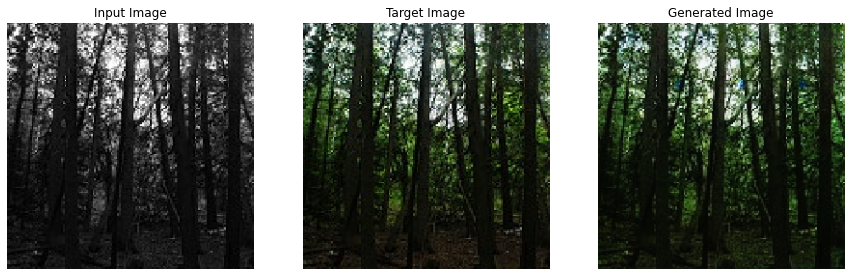

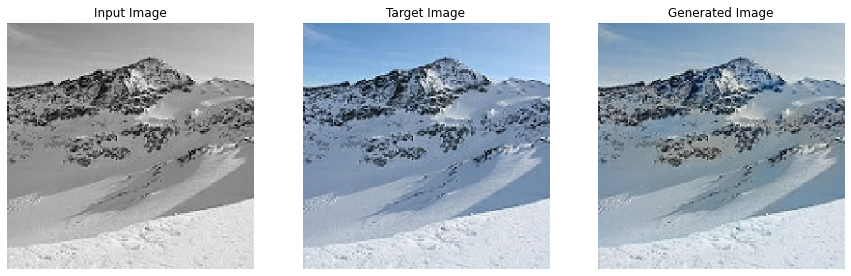

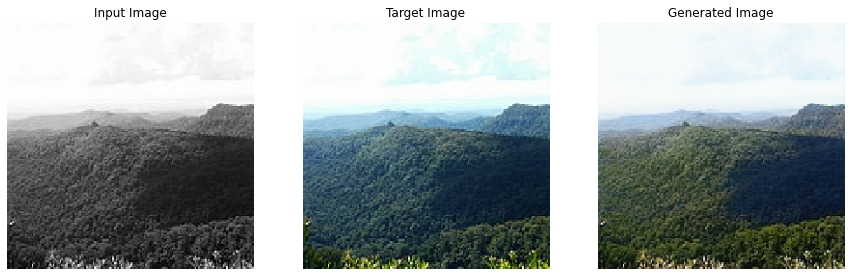

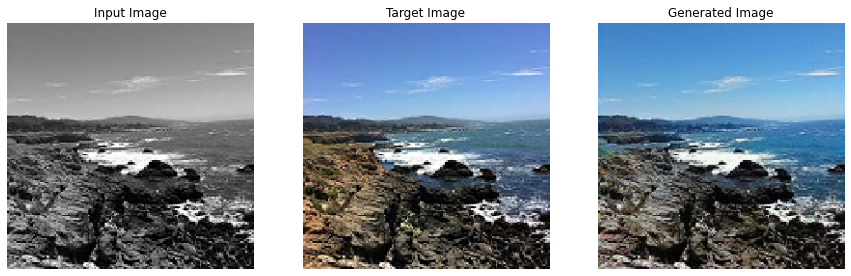

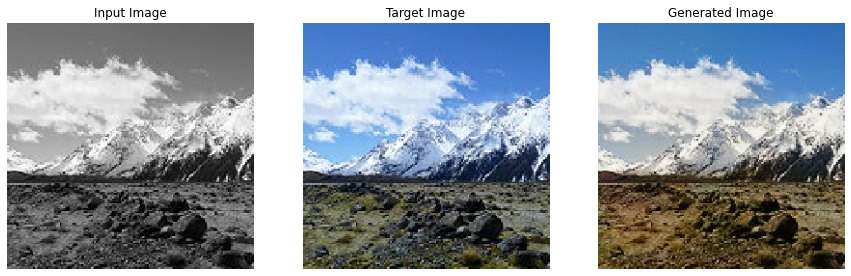

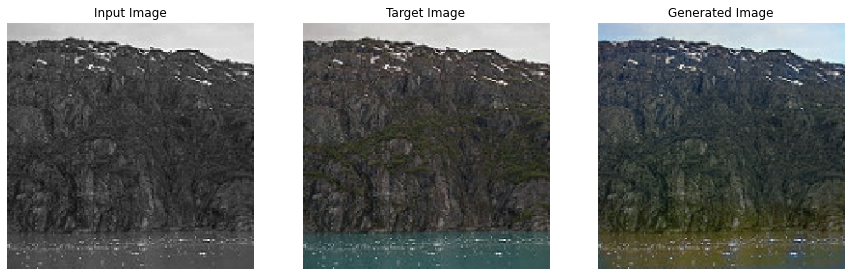

In [ ]:
generate_many_images(generatorl6k200, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

### 100e

In [ ]:
generatorl6k100 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp100e.h5')
generate_many_images(generatorl6k100, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 50e

In [ ]:
generatorl6k50 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp50e.h5')

In [ ]:
generate_many_images(generatorl6k50, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### 20e

In [ ]:
generatorl6k20 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp20e.h5')

In [ ]:
generate_many_images(generatorl6k20, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

# Fantasy

In [ ]:
BUFFER_SIZE = 800 # training image size

path_output = '/content/E6893 Images/fantasy/color'
path_input = '/content/E6893 Images/fantasy/grey'
path_names = '/content/E6893 Images/all_images_fantasy.csv'
files = pd.read_csv(path_names).image_name[BUFFER_SIZE:BUFFER_SIZE+8].tolist()

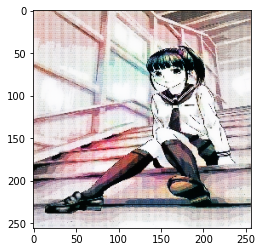

In [ ]:
generatorf400 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_fantasy400e.h5')
generate_one_image(generatorf400, '3174ce875eb89b9fae16ab6b997c9c55_en-us.jpeg', '/content', IMG_HEIGHT, IMG_WIDTH)

In [ ]:
generate_many_images(generatorf400, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
generate_many_images(generatorf400, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

## 300 epochs

In [ ]:
generatorf300 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_fantasy300e.h5')
generate_many_images(generatorf300, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

## 200 epochs

In [ ]:
generatorf = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_fantasy200e.h5')

In [ ]:
generate_many_images(generatorf, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

# Auto

In [ ]:
from keras.utils import img_to_array
from tqdm import tqdm
import cv2

color_img = []
path = '/content/E6893 Images/anime/color1'
path_names = '/content/E6893 Images/all_images_anime.csv'
#files = sorted(os.listdir(path))
files = pd.read_csv(path_names).image_name
# # files = sorted_alphanumeric(files)
i = 0
for f in tqdm(files):      
      if f.startswith('._') or ('gif' in f):
        continue
      img = cv2.imread(os.path.join(path, f), 1)
      # open cv reads images in BGR format so we have to convert it to RGB
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #resizing image
      img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
      img = img.astype('float32') / 255.0
      color_img.append(img_to_array(img))
      if i == 1200:
        break
      i += 1


gray_img = []
path = '/content/E6893 Images/anime/grey'
#files = sorted(os.listdir(path))
# files = sorted_alphanumeric(files)
i = 0
for f in tqdm(files):
      if f.startswith('._') or ('gif' in f):
        continue
      img = cv2.imread(os.path.join(path, f), 1)

      #resizing image
      img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
      img = img.astype('float32') / 255.0
      gray_img.append(img_to_array(img))
      if i == 1200:
        break
      i += 1

100%|██████████| 413/413 [00:02<00:00, 173.33it/s]


In [ ]:
# train_gray_image = gray_img[:800]
# train_color_image = color_img[:800]

# anime: 350
test_gray_image = gray_img[350:]
test_color_image = color_img[350:]

# # reshaping
# train_g = np.reshape(train_gray_image,(len(train_gray_image),IMG_HEIGHT, IMG_WIDTH,3))
# train_c = np.reshape(train_color_image, (len(train_color_image),IMG_HEIGHT, IMG_WIDTH,3))
# print('Train color image shape:',train_c.shape)

test_gray_image = np.reshape(test_gray_image,(len(test_gray_image),IMG_HEIGHT, IMG_WIDTH,3))
test_color_image = np.reshape(test_color_image, (len(test_color_image),IMG_HEIGHT, IMG_WIDTH,3))
print('Test color image shape',test_color_image.shape)

Test color image shape (62, 256, 256, 3)


In [ ]:
# defining function to plot images pair
def plot_images2(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

In [ ]:
autof200 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/auto_fantasy200e.h5')

In [ ]:
for i in range(8):
    predicted = np.clip(autof200.predict(test_gray_image[i].reshape(1,IMG_HEIGHT, IMG_WIDTH,3)),0.0,1.0).reshape(IMG_HEIGHT, IMG_WIDTH,3)
    plot_images2(test_color_image[i],test_gray_image[i],predicted)

Output hidden; open in https://colab.research.google.com to view.

# People

In [ ]:
BUFFER_SIZE = 1300 # training image size

path_output = '/content/people/color'
path_input = '/content/people/grey'
files_input = sorted(os.listdir(path_input))
files_input = [f1 for f1 in files_input if not (f1.startswith('._') or ('gif' in f1))][BUFFER_SIZE+50:BUFFER_SIZE+58]
files_output = sorted(os.listdir(path_output))
files_output = [f2 for f2 in files_output if not (f2.startswith('._') or ('gif' in f2))][BUFFER_SIZE+50:BUFFER_SIZE+58]

## 400 epochs

In [ ]:
generatorp400 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_people400e.h5')
generate_many_images(generatorp400, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

### landscape model

In [ ]:
#landscape model
generatorl6k650 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp650e.h5')
generate_many_images(generatorl6k400, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

## 300 e

In [ ]:
generatorp300 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_people300e.h5')
generate_many_images(generatorp300, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

## 200 epochs

In [ ]:
generatorp200 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_people200e.h5')
generate_many_images(generatorp200, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#landscape model
generatorl6k200 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_landscape6kp200e.h5')
generate_many_images(generatorl6k200, files_input, files_output, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

# Coco

In [ ]:
BUFFER_SIZE = 4200 # training image size

path_output = '/content/coco/color'
path_input = '/content/coco/grey'
path_names = '/content/drive/MyDrive/E6893 Images/coco/all_images.csv'
files = pd.read_csv(path_names).image_name[BUFFER_SIZE:BUFFER_SIZE+8].tolist()

In [ ]:
generatorc500 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_coco500e.h5')
generate_many_images(generatorc500, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
generatorc400 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_coco400e.h5')
generate_many_images(generatorc400, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

## 300 epochs

In [ ]:
generatorc300 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_coco300e.h5')
generate_many_images(generatorc300, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.

## 200 epochs

In [ ]:
generatorc200 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_coco200e.h5')
generate_many_images(generatorc200, files, files, path_input, path_output, IMG_HEIGHT, IMG_WIDTH)

Output hidden; open in https://colab.research.google.com to view.